<a href="https://colab.research.google.com/github/NMNayan57/prediction/blob/main/Parkinson(Review_work_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Relevant Libraries Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC








from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.linear_model import LogisticRegression


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
#Dataset Import
df = pd.read_csv("/content/parkinsons.csv")

In [ ]:
#data preprocessing Start

df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [ ]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

irrelavent datapoints contian serial name

In [ ]:
df = df.drop("name", axis=1)

In [ ]:
df['status'].value_counts()


status
1    147
0     48
Name: count, dtype: int64

information about dataset

In [ ]:
df.isnull().sum()


MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")


There are 0 duplicates data


Here we find class and Gender has object value so we need to convert them into Encoded label through label encoder

Heat map

In [ ]:

# Apply Label Encoding to the 'status' column
#df['name'] = le.fit_transform(df['name'])


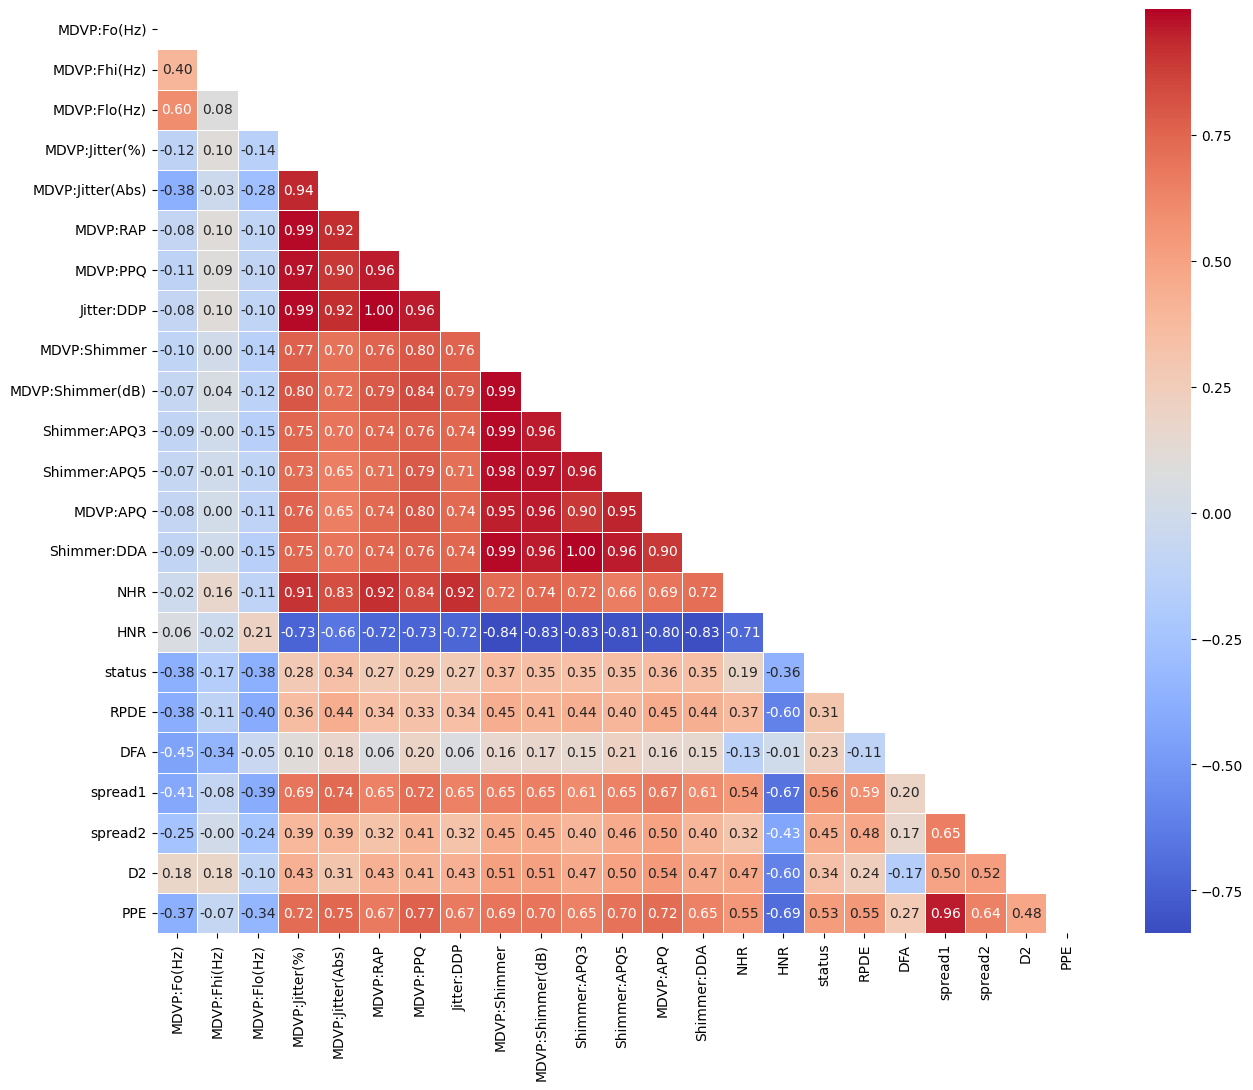

In [ ]:
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 12))

# Create the triangular correlation heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, ax=ax)

# Show the plot
plt.show()

# **Feature **

In [ ]:
# Drop 'name' and separate features and target
X = df.drop(['status'], axis=1)
y = df['status']


In [ ]:
# SECTION 2: Feature Scaling

from sklearn.preprocessing import MinMaxScaler

# 2.1 Standard Scaler for ML Models
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
X_standard = scaler_std.fit_transform(X)

# 2.2 MinMax Scaler for Chi-square (requires non-negative inputs)
scaler_mm = MinMaxScaler()
X_minmax = scaler_mm.fit_transform(X)

# Convert to DataFrame for easier handling
X_std_df = pd.DataFrame(X_standard, columns=X.columns)
X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)

X_std_df.head()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1  \
0  0.332985     0.607532 -0.067893 -0.193225 -0.807838  1.760814  0.801323   
1  1.159454     1.548254 -0.137843 -0.634508 -0.387524  1.837562  1.479853   
2  0.699187     1.175323 -0.291633 -0.279760 -0.662075  1.942048  1.141445   
3  0.806859     1.340229 -0.280719 -0.281346 -0.613134  1.832380  1.440945   
4  1.216839     1.899461 -0.178026 -0.506745 -0.783021  1.909364  1.780940   

    spread2        D2       PPE  
0  0.480477 -0.210531  0.868886  
1  1.311185  0.275077  1.803605  
2  1.017682 -0.103629  1.402661  
3  1.293840  0.062145  1.806954  
4  0.096195 -0.130026  2.267082  

[5 rows x 22 columns]

# Feature selection technique

In [ ]:
# SECTION 3: Feature Selection

from sklearn.feature_selection import chi2
import numpy as np

# 3.1 Chi-square feature selection (needs MinMax scaled data)
chi2_scores, p_vals = chi2(X_minmax_df, y)

chi2_result = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_vals
}).sort_values(by='Chi2 Score', ascending=False)

# Top 10 features based on Chi-square
top10_chi2 = chi2_result.head(10)
top10_chi2


Feature  Chi2 Score   p-value
2       MDVP:Flo(Hz)    6.014075  0.014192
18           spread1    5.832052  0.015737
21               PPE    5.680013  0.017159
0        MDVP:Fo(Hz)    4.319120  0.037686
8       MDVP:Shimmer    4.215342  0.040060
10      Shimmer:APQ3    4.187889  0.040714
13       Shimmer:DDA    4.185769  0.040765
11      Shimmer:APQ5    3.853073  0.049655
9   MDVP:Shimmer(dB)    3.774658  0.052035
12          MDVP:APQ    3.352370  0.067108

In [ ]:

# Adjusted models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_std_df, y)
rf_importances = rf.feature_importances_

xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_std_df, y)
xgb_importances = xgb.feature_importances_

# Combine into DataFrame
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'RF Importance': rf_importances,
    'XGB Importance': xgb_importances
}).sort_values(by='XGB Importance', ascending=False)

feature_importances.head(10)


Feature  RF Importance  XGB Importance
21               PPE       0.151356        0.258145
18           spread1       0.108705        0.125020
16              RPDE       0.034914        0.083609
11      Shimmer:APQ5       0.039680        0.072699
0        MDVP:Fo(Hz)       0.079412        0.068456
9   MDVP:Shimmer(dB)       0.020754        0.065807
1       MDVP:Fhi(Hz)       0.050227        0.062836
10      Shimmer:APQ3       0.020393        0.057133
12          MDVP:APQ       0.023398        0.039766
14               NHR       0.042083        0.031157

In [ ]:
#pip install featurewiz

In [ ]:
#!pip install scikit-learn==1.2.2


In [ ]:
from featurewiz import featurewiz


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Binary_Classification problem 
    Loaded train data. Shape = (195, 23)
    Some column names had special characters which were removed...
    Single_Label Binary_Classification problem 
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  #####

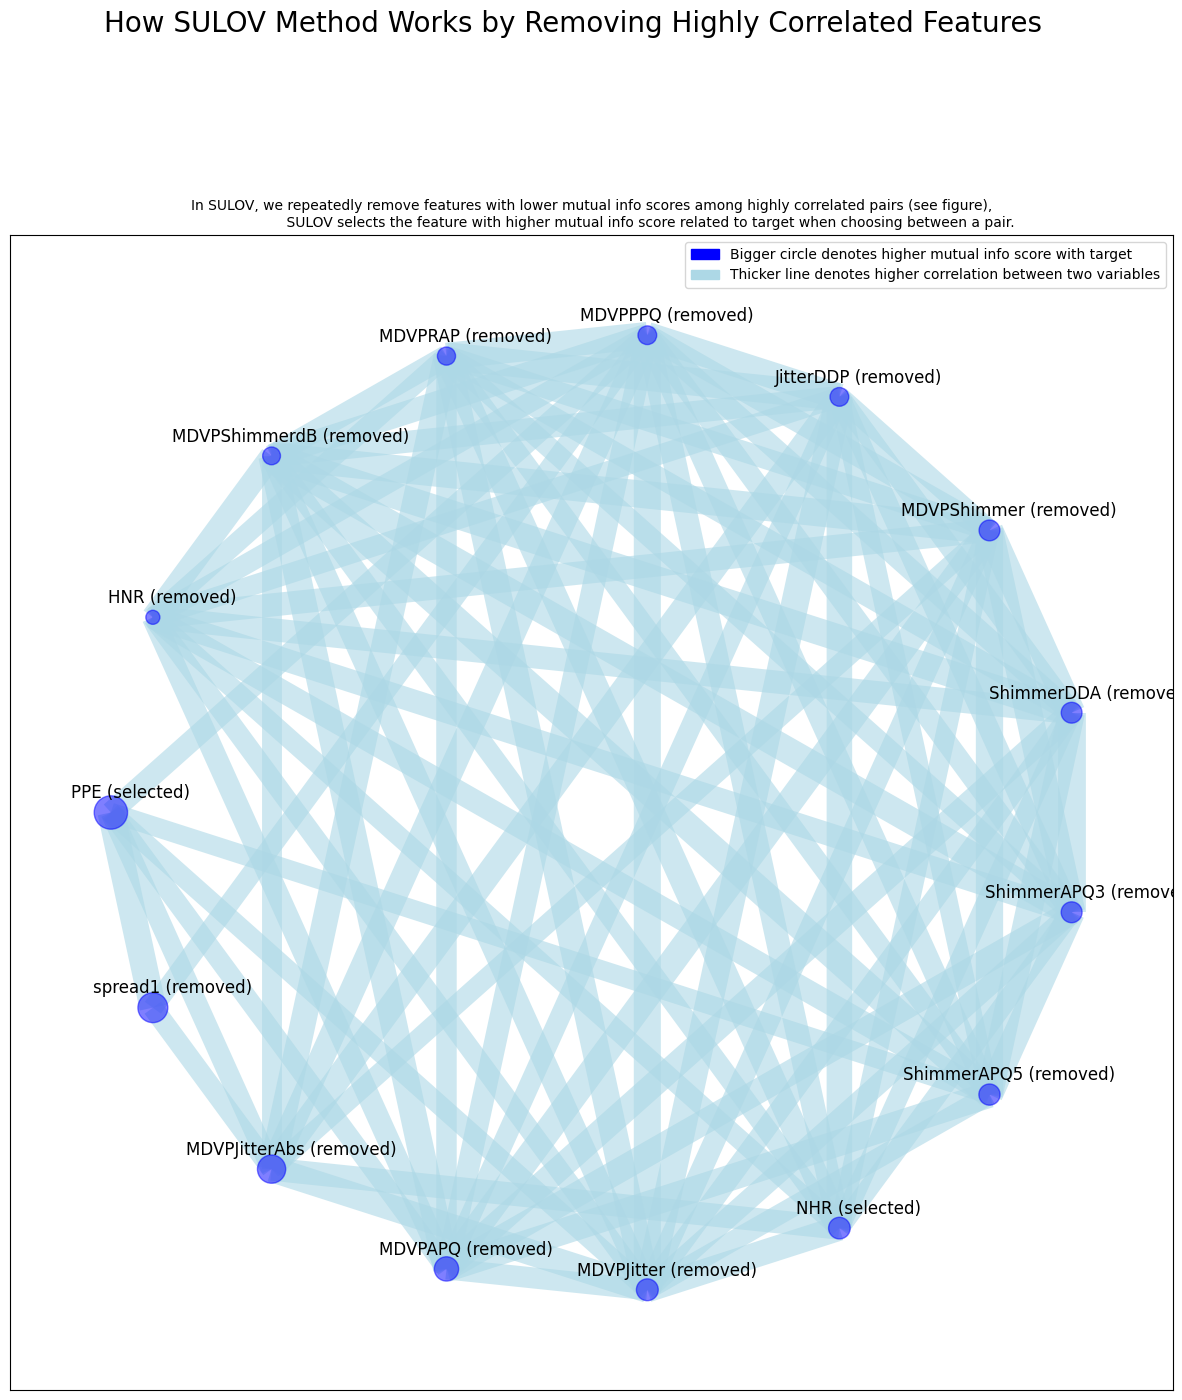

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 9
Final list of selected 9 vars after SULOV = ['MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'RPDE', 'DFA', 'spread2', 'D2', 'PPE', 'NHR']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 2 features per iteration...
    Number of booster rounds = 100
        Selected: ['PPE', 'MDVPFhiHz']
            Time taken for regular XGBoost feature selection = 0 seconds
        Selected: ['PPE', 'RPDE']
            Time taken for regular XGBoost feature selection = 0 seconds
        Selected: ['PPE', 'DFA']
            Time taken for regular XGBoost feature selection = 0 seconds
    

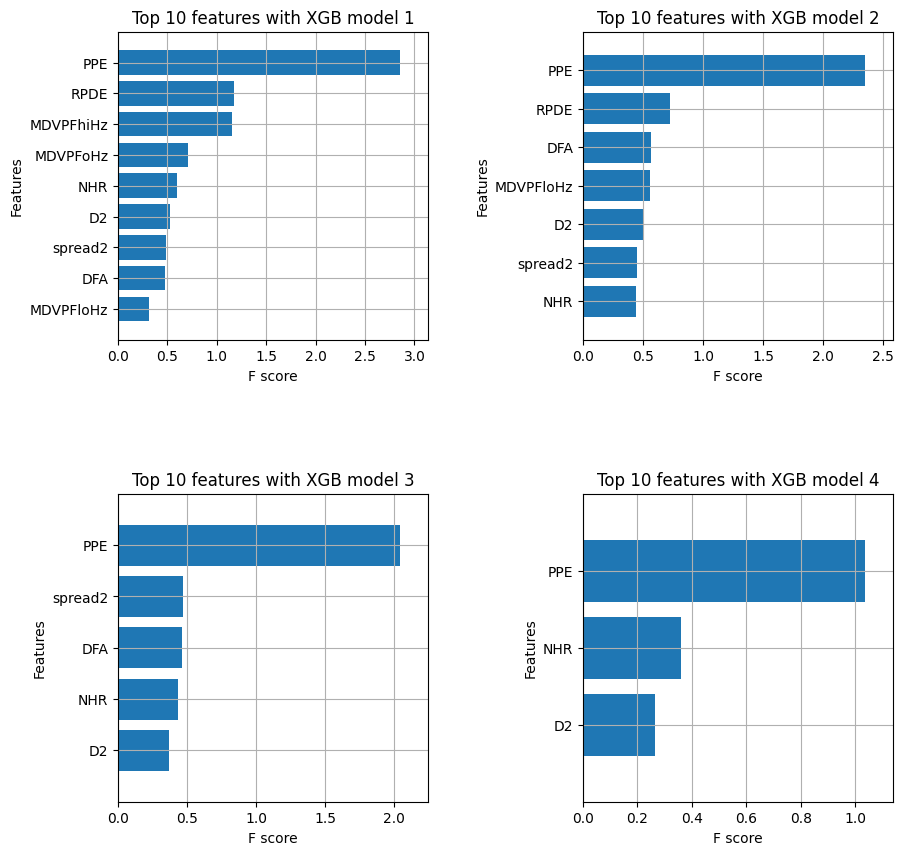

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 5 important features:
['PPE', 'MDVPFhiHz', 'RPDE', 'DFA', 'NHR']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 5 important features and a train dataframe


In [ ]:
target = 'status'

features= featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
print(features)


(['PPE', 'MDVP:Fhi(Hz)', 'RPDE', 'DFA', 'NHR'],           PPE  MDVP:Fhi(Hz)      RPDE       DFA      NHR  status
0    0.284654       157.302  0.414783  0.815285  0.02211       1
1    0.368674       148.650  0.458359  0.819521  0.01929       1
2    0.332634       131.111  0.429895  0.825288  0.01309       1
3    0.368975       137.871  0.434969  0.819235  0.01353       1
4    0.410335       141.781  0.417356  0.823484  0.01767       1
..        ...           ...       ...       ...      ...     ...
190  0.133050       230.978  0.448439  0.657899  0.02764       0
191  0.168895       253.017  0.431674  0.683244  0.01810       0
192  0.131728       240.005  0.407567  0.655683  0.10715       0
193  0.123306       396.961  0.451221  0.643956  0.07223       0
194  0.148569       260.277  0.462803  0.664357  0.04398       0

[195 rows x 6 columns])


In [ ]:
# Finalize selected features for model training based on combined insights (Chi2 + RF/XGB + SHAP + FeatureWiz)
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
                     'RPDE', 'DFA', 'spread2', 'D2', 'PPE', 'NHR']

# Reduce X_scaled_df to these features
X_selected = X_std_df[selected_features]
X_selected.head()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)      RPDE       DFA   spread2  \
0    -0.829300     -0.436165     -0.952037 -0.807838  1.760814  0.480477   
1    -0.770972     -0.530974     -0.057721 -0.387524  1.837562  1.311185   
2    -0.909476     -0.723168     -0.109875 -0.662075  1.942048  1.017682   
3    -0.909622     -0.649092     -0.114229 -0.613134  1.832380  1.293840   
4    -0.925657     -0.606245     -0.130608 -0.783021  1.909364  0.096195   

         D2       PPE       NHR  
0 -0.210531  0.868886 -0.067893  
1  0.275077  1.803605 -0.137843  
2 -0.103629  1.402661 -0.291633  
3  0.062145  1.806954 -0.280719  
4 -0.130026  2.267082 -0.178026

In [ ]:
featuresinit=['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', ' Shimmer:APQ5','MDVP:APQ ',
              'Shimmer:DDA',' NHR','HNR',' status','RPDE','DFA','spread1','spread2','D2','PPE']

In [ ]:
featuresnewfromfeaturewiz=['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2','PPE','NHR']


In [ ]:
#After Domain Expert Opinion, FeatureWIZ, FilterBased (Chi-Squared) and WrapperBased  Method = Selected Features.
featuresfinal=['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2','PPE','NHR']

In [ ]:
features_for_lime=featuresfinal

In [ ]:
X_selected

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)      RPDE       DFA   spread2  \
0      -0.829300     -0.436165     -0.952037 -0.807838  1.760814  0.480477   
1      -0.770972     -0.530974     -0.057721 -0.387524  1.837562  1.311185   
2      -0.909476     -0.723168     -0.109875 -0.662075  1.942048  1.017682   
3      -0.909622     -0.649092     -0.114229 -0.613134  1.832380  1.293840   
4      -0.925657     -0.606245     -0.130608 -0.783021  1.909364  0.096195   
..           ...           ...           ...       ...       ...       ...   
190     0.483467      0.371185     -0.508265 -0.483208 -1.090704 -1.256837   
191     1.339202      0.612690     -0.618218 -0.644916 -0.631503 -1.168475   
192     0.495578      0.470104     -0.968393 -0.877441 -1.130853 -0.818079   
193     1.078761      2.190044     -0.954180 -0.456374 -1.343323 -0.229066   
194     1.454817      0.692246     -0.883481 -0.344660 -0.973698 -0.430853   

           D2       PPE       NHR  
0   -0.210531  0.868886 -0.067893  
1    0.275077  1.803605 -0.137843  
2   -0.103629  1.402661 -0.291633  
3    0.062145  1.806954 -0.280719  
4   -0.130026  2.267082 -0.178026  
..        ...       ...       ...  
190  0.721944 -0.817703  0.069278  
191  1.054135 -0.418929 -0.167360  
192  0.780338 -0.832410  2.041513  
193 -0.637003 -0.926105  1.175327  
194  0.454802 -0.645055  0.474590  

[195 rows x 9 columns]

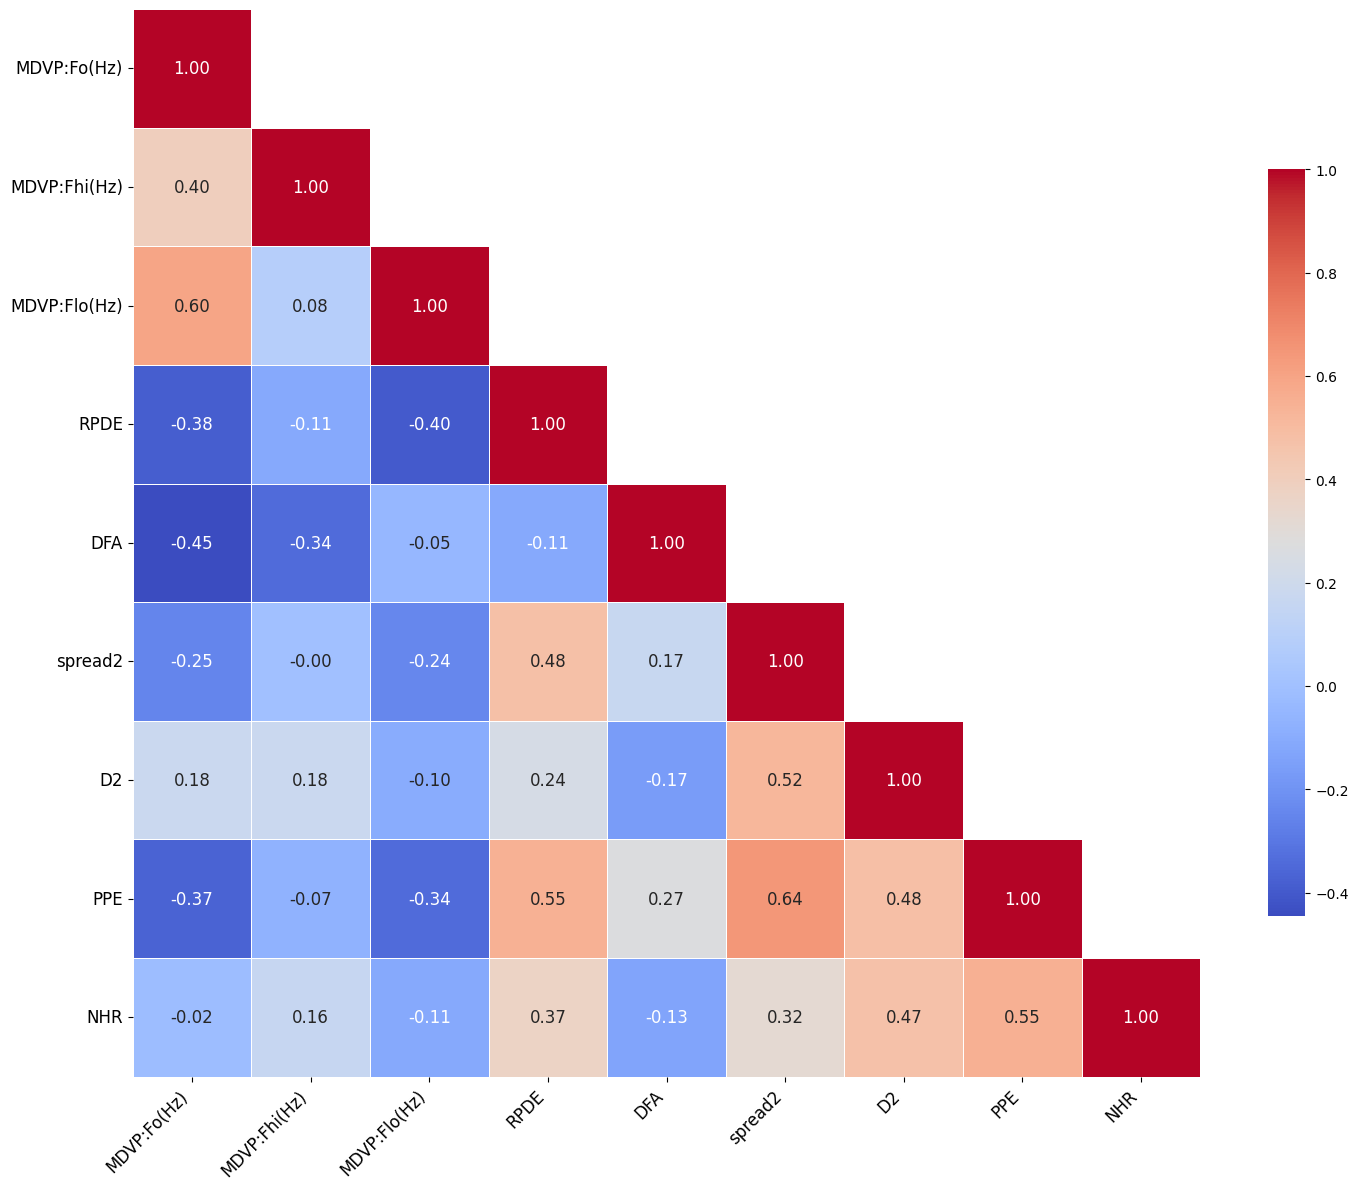

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_selected.corr()

# Generate a mask for the upper triangle (excluding diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.7},
    annot_kws={"size": 12}
)

# Improve layout and style
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# SECTION: Train-test split based on selected features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Use selected features for final training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# Show dataset split info
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)



Number transactions X_train dataset:  (156, 9)
Number transactions y_train dataset:  (156,)
Number transactions X_test dataset:  (39, 9)
Number transactions y_test dataset:  (39,)


# **result outpt funcion **

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, mean_squared_error,
    mean_absolute_error, mean_squared_log_error, matthews_corrcoef,
    accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.metrics import geometric_mean_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Train and predict
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)

    print(f"\n🔍 Evaluation Report: {model_name}\n")
    print(classification_report(y_test, predictions))

    # Basic metrics
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, zero_division=0)
    rec = recall_score(y_test, predictions, zero_division=0)
    f1 = f1_score(y_test, predictions, zero_division=0)

    # Advanced metrics
    gmean = geometric_mean_score(y_test, predictions)
    mcc = matthews_corrcoef(y_test, predictions)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    try:
        msle = mean_squared_log_error(y_test, predictions)
    except ValueError:
        msle = "Not defined (due to log error - possibly negative/zero prediction)"

    mean_pred = np.mean(predictions)
    std_pred = np.std(predictions)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")
    print(f"✅ G-Mean: {gmean:.4f} | MCC: {mcc:.4f}")
    print(f"📉 MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | MSLE: {msle}")
    print(f"📊 Mean of Predictions: {mean_pred:.4f} | Std Dev: {std_pred:.4f}")

    # Confusion matrix values
    cm = confusion_matrix(y_test, predictions)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plotting combined confusion matrix
    fig, ax = plt.subplots(figsize=(6, 5))
    labels = np.asarray([
        [f"{count}\n{percent:.2%}" for count, percent in zip(row, row_percent)]
        for row, row_percent in zip(cm, cm_norm)
    ])
    sns.heatmap(cm_norm, annot=labels, fmt="", cmap='Blues', square=True,
                cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='white')
    plt.title(f"{model_name} - Confusion Matrix", fontsize=12)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



🔍 Evaluation Report: Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

✅ Accuracy: 0.9231
✅ Precision: 0.9333 | Recall: 0.9655 | F1-Score: 0.9492
✅ G-Mean: 0.8789 | MCC: 0.7934
📉 MSE: 0.0769 | RMSE: 0.2774 | MAE: 0.0769 | MSLE: 0.03695792414755395
📊 Mean of Predictions: 0.7692 | Std Dev: 0.4213


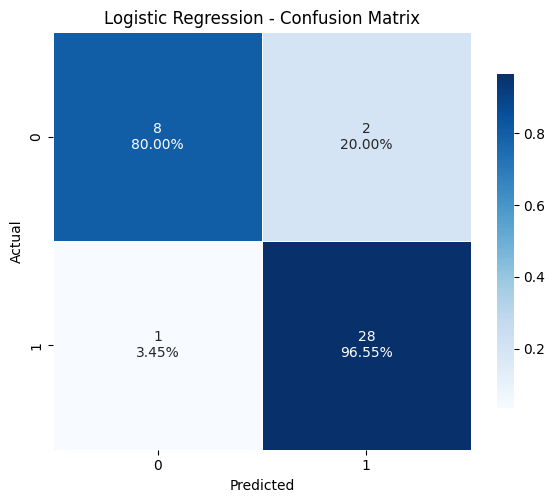

In [ ]:

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, X_train, y_train, X_test, y_test, model_name="Logistic Regression")




🔍 Evaluation Report: Decision Tree

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.93      0.90      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.85      0.84        39
weighted avg       0.88      0.87      0.87        39

✅ Accuracy: 0.8718
✅ Precision: 0.9286 | Recall: 0.8966 | F1-Score: 0.9123
✅ G-Mean: 0.8469 | MCC: 0.6759
📉 MSE: 0.1282 | RMSE: 0.3581 | MAE: 0.1282 | MSLE: 0.061596540245923245
📊 Mean of Predictions: 0.7179 | Std Dev: 0.4500


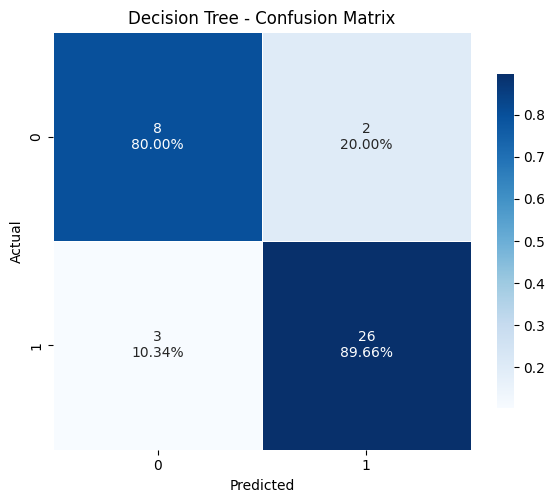

In [ ]:
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train, y_train, X_test, y_test, model_name="Decision Tree")


🔍 Evaluation Report: SVM1 (Linear)

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

✅ Accuracy: 0.9231
✅ Precision: 0.9062 | Recall: 1.0000 | F1-Score: 0.9508
✅ G-Mean: 0.8367 | MCC: 0.7965
📉 MSE: 0.0769 | RMSE: 0.2774 | MAE: 0.0769 | MSLE: 0.03695792414755395
📊 Mean of Predictions: 0.8205 | Std Dev: 0.3838


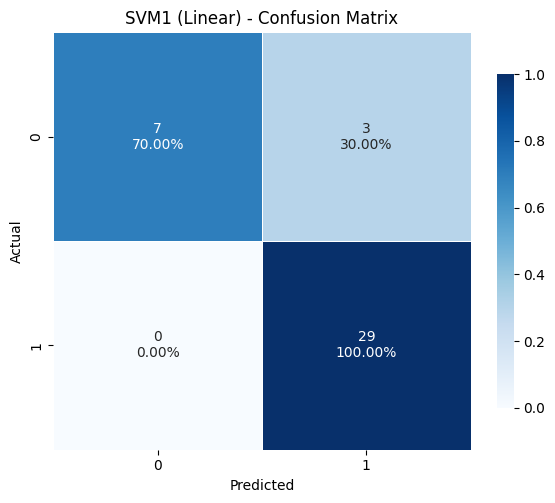

In [ ]:
svm_linear = SVC(kernel='linear')
evaluate_model(svm_linear, X_train, y_train, X_test, y_test, model_name="SVM1 (Linear)")


🔍 Evaluation Report: SVM2 (RBF)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

✅ Accuracy: 0.9744
✅ Precision: 0.9667 | Recall: 1.0000 | F1-Score: 0.9831
✅ G-Mean: 0.9487 | MCC: 0.9327
📉 MSE: 0.0256 | RMSE: 0.1601 | MAE: 0.0256 | MSLE: 0.01231930804918465
📊 Mean of Predictions: 0.7692 | Std Dev: 0.4213


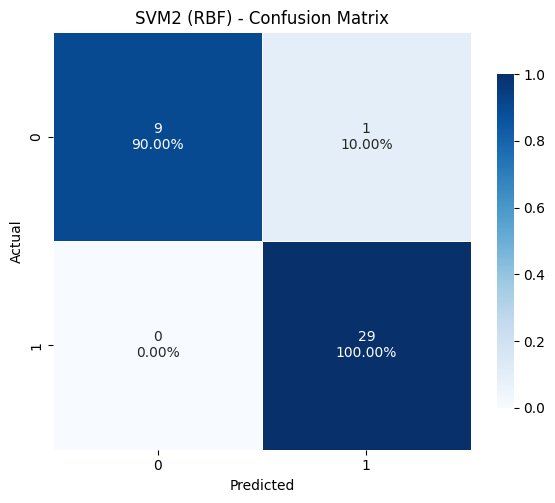

In [ ]:
# 8. SVM RBF
svm_rbf = SVC(kernel='rbf')
evaluate_model(svm_rbf, X_train, y_train, X_test, y_test, model_name="SVM2 (RBF)")


🔍 Evaluation Report: KNN (Avg)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

✅ Accuracy: 0.9744
✅ Precision: 1.0000 | Recall: 0.9655 | F1-Score: 0.9825
✅ G-Mean: 0.9826 | MCC: 0.9369
📉 MSE: 0.0256 | RMSE: 0.1601 | MAE: 0.0256 | MSLE: 0.01231930804918465
📊 Mean of Predictions: 0.7179 | Std Dev: 0.4500


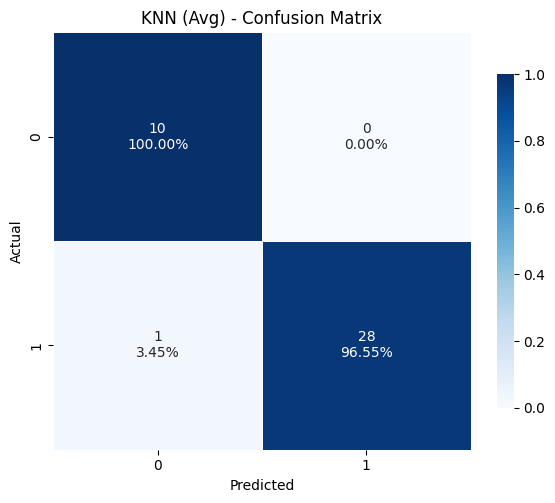

In [ ]:
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, y_train, X_test, y_test, model_name="KNN (Avg)")


🔍 Evaluation Report: GNB (Avg)

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.91      0.72      0.81        29

    accuracy                           0.74        39
   macro avg       0.71      0.76      0.71        39
weighted avg       0.81      0.74      0.76        39

✅ Accuracy: 0.7436
✅ Precision: 0.9130 | Recall: 0.7241 | F1-Score: 0.8077
✅ G-Mean: 0.7611 | MCC: 0.4653
📉 MSE: 0.2564 | RMSE: 0.5064 | MAE: 0.2564 | MSLE: 0.12319308049184652
📊 Mean of Predictions: 0.5897 | Std Dev: 0.4919


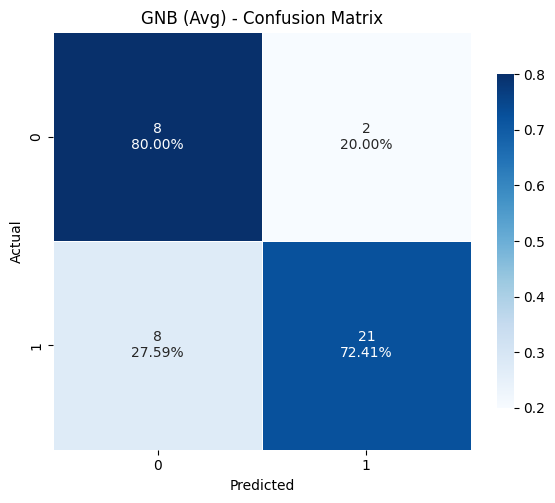

In [ ]:
gnb = GaussianNB()
evaluate_model(gnb, X_train, y_train, X_test, y_test, model_name="GNB (Avg)")


🔍 Evaluation Report: XGB (Avg)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39

✅ Accuracy: 0.8718
✅ Precision: 0.9615 | Recall: 0.8621 | F1-Score: 0.9091
✅ G-Mean: 0.8808 | MCC: 0.7059
📉 MSE: 0.1282 | RMSE: 0.3581 | MAE: 0.1282 | MSLE: 0.06159654024592326
📊 Mean of Predictions: 0.6667 | Std Dev: 0.4714


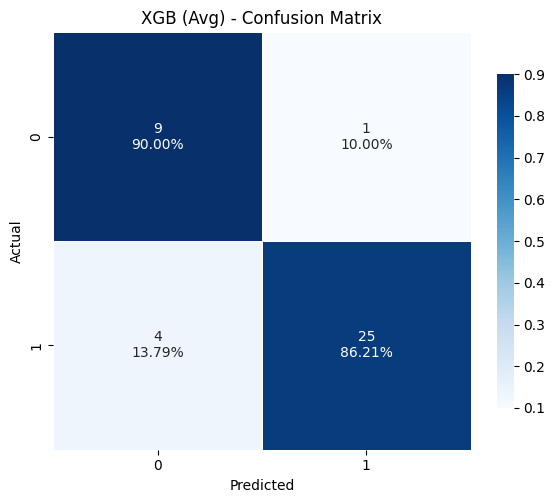

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb, X_train, y_train, X_test, y_test, model_name="XGB (Avg)")


🔍 Evaluation Report: ADABOOST (Avg)

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.89      0.86      0.88        29

    accuracy                           0.82        39
   macro avg       0.76      0.78      0.77        39
weighted avg       0.83      0.82      0.82        39

✅ Accuracy: 0.8205
✅ Precision: 0.8929 | Recall: 0.8621 | F1-Score: 0.8772
✅ G-Mean: 0.7768 | MCC: 0.5454
📉 MSE: 0.1795 | RMSE: 0.4237 | MAE: 0.1795 | MSLE: 0.08623515634429256
📊 Mean of Predictions: 0.7179 | Std Dev: 0.4500


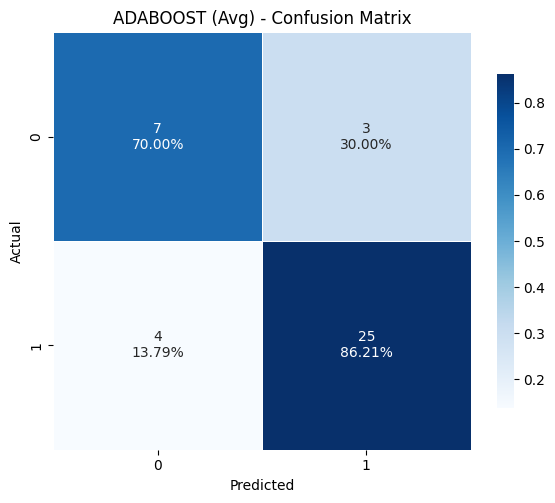

In [ ]:
adb = AdaBoostClassifier()
evaluate_model(adb, X_train, y_train, X_test, y_test, model_name="ADABOOST (Avg)")


🔍 Evaluation Report: RF (Avg)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

✅ Accuracy: 0.9231
✅ Precision: 0.9333 | Recall: 0.9655 | F1-Score: 0.9492
✅ G-Mean: 0.8789 | MCC: 0.7934
📉 MSE: 0.0769 | RMSE: 0.2774 | MAE: 0.0769 | MSLE: 0.03695792414755395
📊 Mean of Predictions: 0.7692 | Std Dev: 0.4213


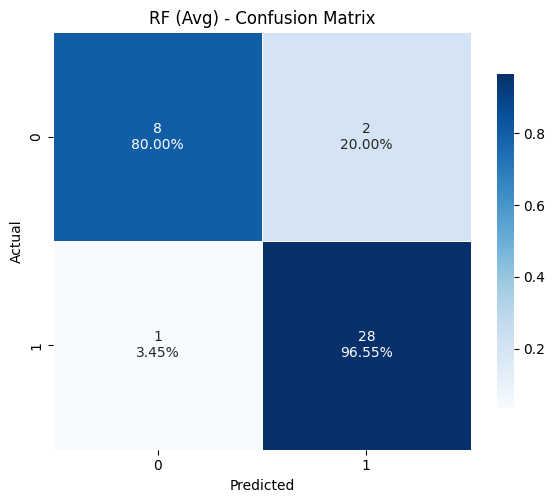

In [ ]:
rf = RandomForestClassifier()
evaluate_model(rf, X_train, y_train, X_test, y_test, model_name="RF (Avg)")


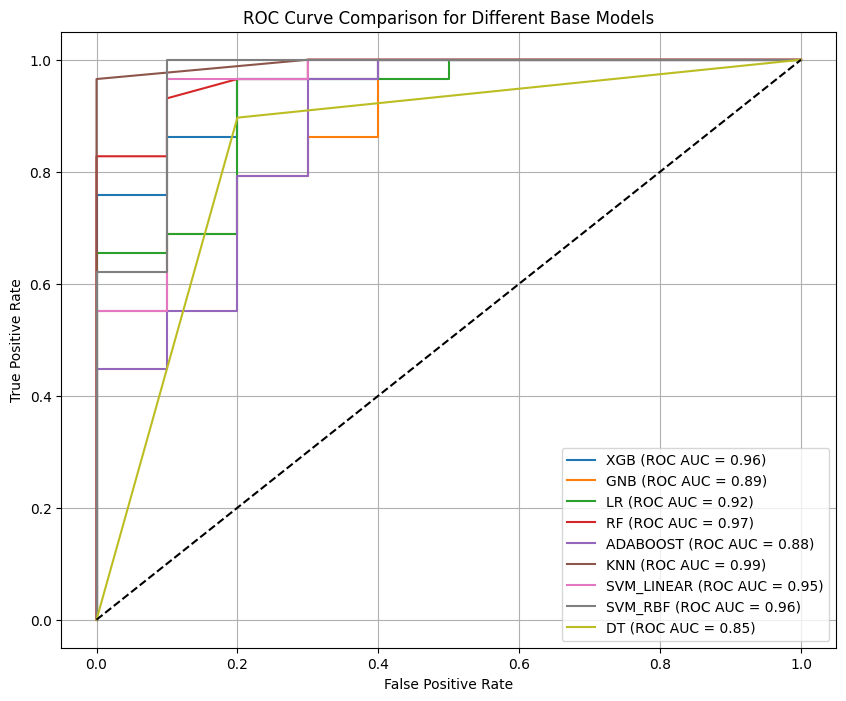

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Make sure SVC models have probability=True if you want predict_proba
# svm = SVC(probability=True)
# svm1 = SVC(probability=True)

# Define your models
models = [
    ('XGB', xgb),
    ('GNB', gnb),
    ('lr', lr),
    ('RF', rf),
    ('adaboost', adb),
    ('KNN', knn),
    ('svm_linear', svm_linear),
    ('svm_rbf', svm_rbf),
    ('DT', dt)
]

# Fit SVM models before plotting ROC curves
#svm.fit(X_train, y_train.ravel())
#svm1.fit(X_train, y_train.ravel())

# Plot ROC curves and calculate ROC AUC scores for each model
plt.figure(figsize=(10, 8))
for model_name, model in models:
    # Use predict_proba if available, otherwise use decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{model_name.upper()} (ROC AUC = {roc_auc:.2f})')

# Plot the diagonal line for the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels, legend, and grid
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Different Base Models')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot as a PDF file
plt.savefig('ROC_Curve_Comparison.pdf')

# Show the plot
plt.show()


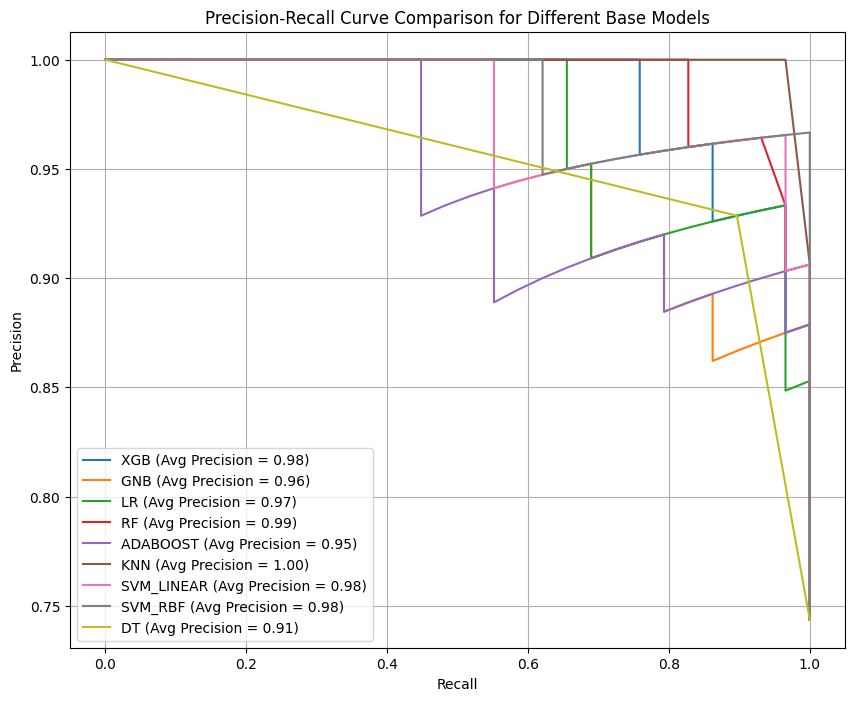

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.svm import SVC

# Make sure your SVC models were initialized like this:
# svm = SVC(probability=True)
# svm1 = SVC(probability=True)

# Define your models
models = [
    ('XGB', xgb),
    ('GNB', gnb),
    ('LR', lr),
    ('RF', rf),
    ('Adaboost', adb),
    ('KNN', knn),
    ('Svm_linear', svm_linear),
    ('Svm_rbf', svm_rbf),
    ('DT', dt)
]

# Fit SVM models before plotting PRC curves (if not already fitted)
#svm.fit(X_train, y_train.ravel())
#svm1.fit(X_train, y_train.ravel())

# Plot PRC curves and calculate Average Precision scores for each model
plt.figure(figsize=(10, 8))
for model_name, model in models:
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # fallback for models like SVM without predict_proba: use decision_function
        y_proba = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f'{model_name.upper()} (Avg Precision = {avg_precision:.2f})')

# Add labels, legend, and grid
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison for Different Base Models')
plt.legend(loc='lower left')
plt.grid(True)

# Save the plot as a PDF file
plt.savefig('Precision_Recall_Curve_Comparison.pdf')

# Show the plot
plt.show()


In [ ]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))





Before OverSampling, counts of label '1': 118
Before OverSampling, counts of label '0': 38 

Before OverSampling, the shape of train_X: (195, 22)
Before OverSampling, the shape of train_y: (195,) 



In [ ]:
#pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

# Step 1: Split the selected features and target
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Apply SMOTE to the training set only
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (236, 9)
After OverSampling, the shape of train_y: (236,) 

After OverSampling, counts of label '1': 118
After OverSampling, counts of label '0': 118


In [ ]:
X_train_res

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)      RPDE       DFA   spread2  \
0      -1.053431     -0.915089     -0.372858 -1.248572  1.051912 -0.410322   
1       0.548141      0.092652     -0.944044  0.559041  0.208121  1.401134   
2      -1.060359     -0.761522     -0.248116  1.494012 -0.206763  1.148357   
3       2.010410      0.550328      2.508712 -1.866157 -1.158230 -1.536962   
4       1.176645      0.376993     -0.693224  0.362349 -1.548509 -0.158157   
..           ...           ...           ...       ...       ...       ...   
231     1.114587      0.417684     -0.454526 -0.485559 -0.818420 -1.483435   
232    -0.611819     -0.632665      0.074436 -0.649801  1.128250  0.358441   
233     1.088625      0.135202      1.745358 -0.640135  0.433705 -0.638041   
234     1.083209      0.132223      1.745272 -0.650368  0.432410 -0.632755   
235     1.900624      0.472701      2.499153 -1.869715 -0.851974 -2.221996   

           D2       PPE       NHR  
0   -1.290736 -0.360445 -0.509667  
1    1.879110  0.395686  0.740498  
2    0.654679  0.242161  0.010987  
3    0.091698 -1.240652 -0.432772  
4    0.232887 -0.194905 -0.117751  
..        ...       ...       ...  
231  0.255815 -1.021025 -0.254413  
232 -0.594411 -0.742905 -0.496477  
233 -0.754809 -1.530798 -0.573779  
234 -0.852572 -1.511068 -0.569345  
235  0.209324 -1.229212 -0.520723  

[236 rows x 9 columns]

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, mean_squared_error,
    mean_absolute_error, mean_squared_log_error, matthews_corrcoef,
    accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model_with_smote(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Apply SMOTE to the training set
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

    # Train and predict on the resampled training data
    model.fit(X_train_res, y_train_res.ravel())
    predictions = model.predict(X_test)

    print(f"\n🔍 Evaluation Report: {model_name}\n")
    print(classification_report(y_test, predictions))

    # Basic metrics
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, zero_division=0)
    rec = recall_score(y_test, predictions, zero_division=0)
    f1 = f1_score(y_test, predictions, zero_division=0)

    # Advanced metrics
    gmean = geometric_mean_score(y_test, predictions)
    mcc = matthews_corrcoef(y_test, predictions)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    try:
        msle = mean_squared_log_error(y_test, predictions)
    except ValueError:
        msle = "Not defined (due to log error - possibly negative/zero prediction)"

    mean_pred = np.mean(predictions)
    std_pred = np.std(predictions)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")
    print(f"✅ G-Mean: {gmean:.4f} | MCC: {mcc:.4f}")
    print(f"📉 MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | MSLE: {msle}")
    print(f"📊 Mean of Predictions: {mean_pred:.4f} | Std Dev: {std_pred:.4f}")

    # Confusion matrix values
    cm = confusion_matrix(y_test, predictions)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plotting combined confusion matrix
    fig, ax = plt.subplots(figsize=(6, 5))
    labels = np.asarray([
        [f"{count}\n{percent:.2%}" for count, percent in zip(row, row_percent)]
        for row, row_percent in zip(cm, cm_norm)
    ])
    sns.heatmap(cm_norm, annot=labels, fmt="", cmap='Blues', square=True,
                cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='white')
    plt.title(f"{model_name} - Confusion Matrix (SMOTE)", fontsize=12)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



🔍 Evaluation Report: LR_SM (Avg)

              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39

✅ Accuracy: 0.7179
✅ Precision: 0.9091 | Recall: 0.6897 | F1-Score: 0.7843
✅ G-Mean: 0.7428 | MCC: 0.4312
📉 MSE: 0.2821 | RMSE: 0.5311 | MAE: 0.2821 | MSLE: 0.13551238854103118
📊 Mean of Predictions: 0.5641 | Std Dev: 0.4959


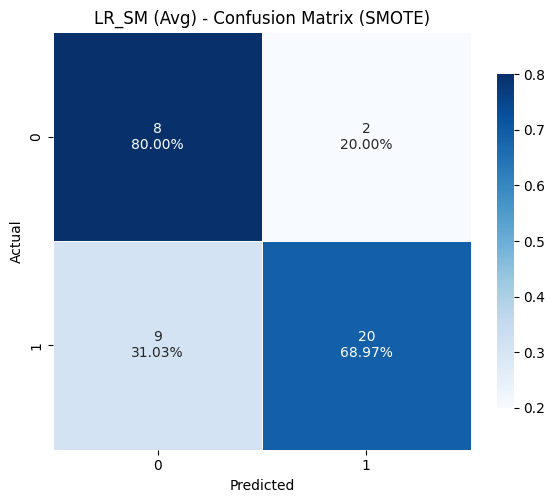

In [ ]:
# 1. Logistic Regression (SMOTE)
lr_sm = LogisticRegression(max_iter=1000)
evaluate_model_with_smote(lr_sm, X_train, y_train, X_test, y_test, model_name="LR_SM (Avg)")


🔍 Evaluation Report: DT_SM (Avg)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.86      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.93      0.88        39
weighted avg       0.93      0.90      0.90        39

✅ Accuracy: 0.8974
✅ Precision: 1.0000 | Recall: 0.8621 | F1-Score: 0.9259
✅ G-Mean: 0.9285 | MCC: 0.7847
📉 MSE: 0.1026 | RMSE: 0.3203 | MAE: 0.1026 | MSLE: 0.0492772321967386
📊 Mean of Predictions: 0.6410 | Std Dev: 0.4797


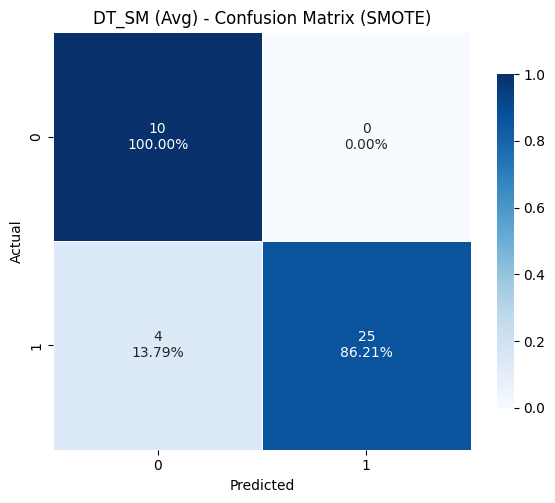

In [ ]:

# 2. Decision Tree (SMOTE)
dt_sm = DecisionTreeClassifier()
evaluate_model_with_smote(dt_sm, X_train, y_train, X_test, y_test, model_name="DT_SM (Avg)")


In [ ]:
#decision tree after
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_res, y_train_res.ravel())
predictions = DT1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.83      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.91      0.85        39
weighted avg       0.91      0.87      0.88        39

mse= 0.1282051282051282
msle= 0.06159654024592326
mae= 0.1282051282051282
rmse= 0.35805743701971643



🔍 Evaluation Report: KNN_SM (Avg)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.79      0.88        29

    accuracy                           0.85        39
   macro avg       0.81      0.90      0.83        39
weighted avg       0.90      0.85      0.86        39

✅ Accuracy: 0.8462
✅ Precision: 1.0000 | Recall: 0.7931 | F1-Score: 0.8846
✅ G-Mean: 0.8906 | MCC: 0.7041
📉 MSE: 0.1538 | RMSE: 0.3922 | MAE: 0.1538 | MSLE: 0.07391584829510792
📊 Mean of Predictions: 0.5897 | Std Dev: 0.4919


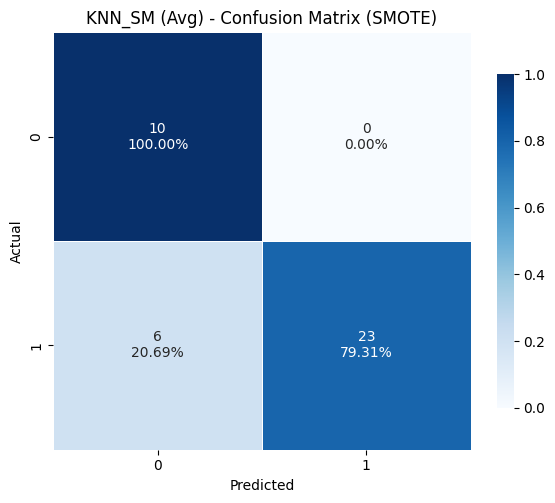

In [ ]:

# 3. KNN (SMOTE)
knn_sm = KNeighborsClassifier()
evaluate_model_with_smote(knn_sm, X_train, y_train, X_test, y_test, model_name="KNN_SM (Avg)")





🔍 Evaluation Report: RF_SM (Avg)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39

✅ Accuracy: 0.9487
✅ Precision: 1.0000 | Recall: 0.9310 | F1-Score: 0.9643
✅ G-Mean: 0.9649 | MCC: 0.8808
📉 MSE: 0.0513 | RMSE: 0.2265 | MAE: 0.0513 | MSLE: 0.0246386160983693
📊 Mean of Predictions: 0.6923 | Std Dev: 0.4615


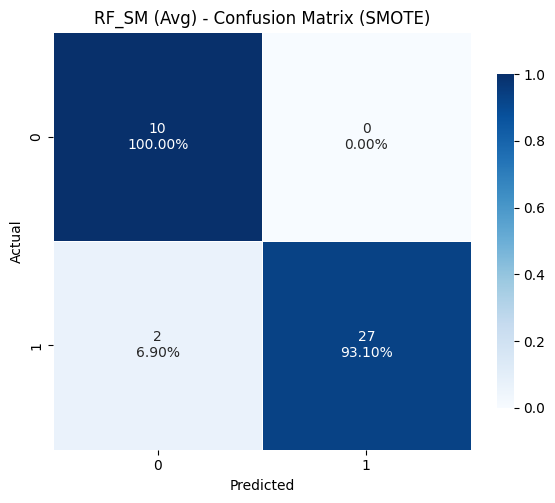

In [ ]:
# 4. Random Forest (SMOTE)
rf_sm = RandomForestClassifier()
evaluate_model_with_smote(rf_sm, X_train, y_train, X_test, y_test, model_name="RF_SM (Avg)")




🔍 Evaluation Report: XGB_SM (Avg)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39

✅ Accuracy: 0.8718
✅ Precision: 0.9615 | Recall: 0.8621 | F1-Score: 0.9091
✅ G-Mean: 0.8808 | MCC: 0.7059
📉 MSE: 0.1282 | RMSE: 0.3581 | MAE: 0.1282 | MSLE: 0.06159654024592326
📊 Mean of Predictions: 0.6667 | Std Dev: 0.4714


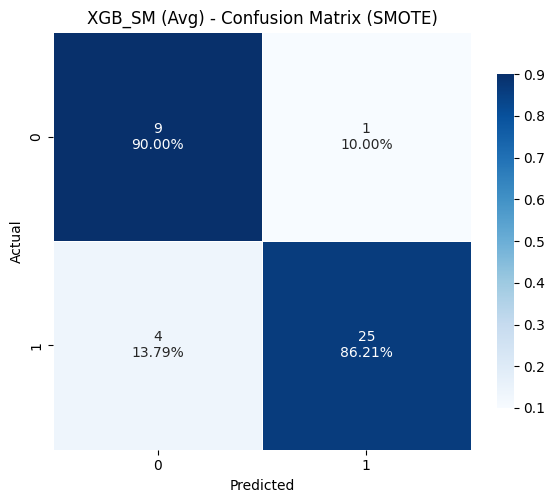

In [ ]:
# 5. XGBoost (SMOTE)
xgb_sm = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model_with_smote(xgb_sm, X_train, y_train, X_test, y_test, model_name="XGB_SM (Avg)")




🔍 Evaluation Report: GNB_SM (Avg)

              precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.96      0.76      0.85        29

    accuracy                           0.79        39
   macro avg       0.76      0.83      0.77        39
weighted avg       0.86      0.79      0.81        39

✅ Accuracy: 0.7949
✅ Precision: 0.9565 | Recall: 0.7586 | F1-Score: 0.8462
✅ G-Mean: 0.8263 | MCC: 0.5847
📉 MSE: 0.2051 | RMSE: 0.4529 | MAE: 0.2051 | MSLE: 0.0985544643934772
📊 Mean of Predictions: 0.5897 | Std Dev: 0.4919


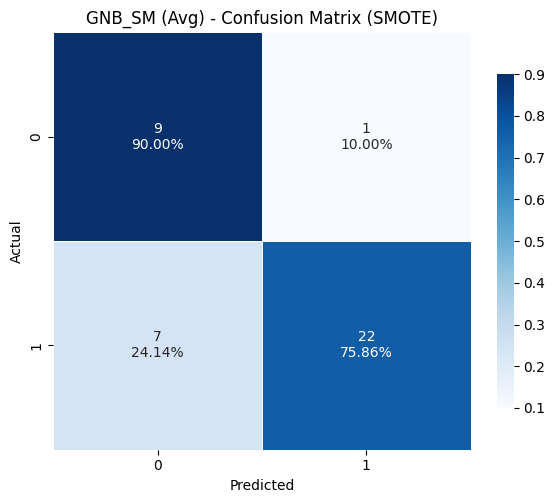

In [ ]:
# 6. Gaussian Naive Bayes (SMOTE)
gnb_sm = GaussianNB()
evaluate_model_with_smote(gnb_sm, X_train, y_train, X_test, y_test, model_name="GNB_SM (Avg)")



🔍 Evaluation Report: SVM1_SM (Linear)

              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39

✅ Accuracy: 0.7692
✅ Precision: 0.9545 | Recall: 0.7241 | F1-Score: 0.8235
✅ G-Mean: 0.8073 | MCC: 0.5496
📉 MSE: 0.2308 | RMSE: 0.4804 | MAE: 0.2308 | MSLE: 0.11087377244266186
📊 Mean of Predictions: 0.5641 | Std Dev: 0.4959


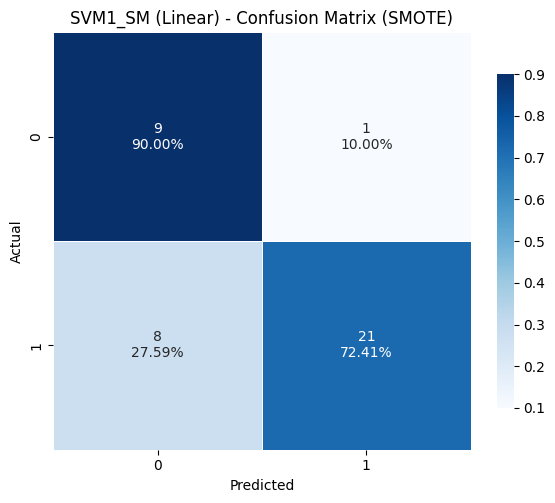

In [ ]:

# 7. SVM Linear (SMOTE)
svm_linear_sm = SVC(kernel='linear')
evaluate_model_with_smote(svm_linear_sm, X_train, y_train, X_test, y_test, model_name="SVM1_SM (Linear)")



🔍 Evaluation Report: SVM2_SM (RBF)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39

✅ Accuracy: 0.8974
✅ Precision: 0.9630 | Recall: 0.8966 | F1-Score: 0.9286
✅ G-Mean: 0.8983 | MCC: 0.7536
📉 MSE: 0.1026 | RMSE: 0.3203 | MAE: 0.1026 | MSLE: 0.0492772321967386
📊 Mean of Predictions: 0.6923 | Std Dev: 0.4615


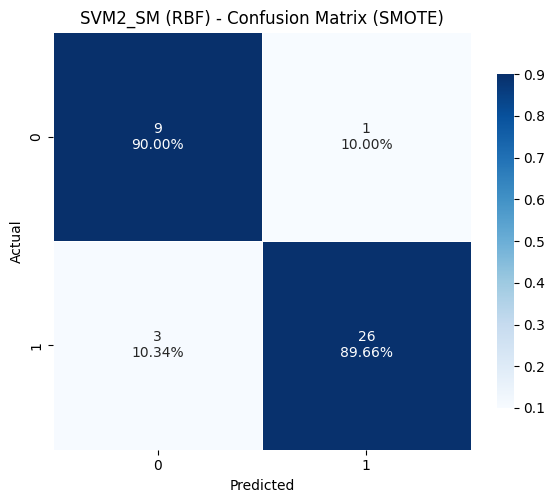

In [ ]:
# 8. SVM RBF (SMOTE)
svm_rbf_sm = SVC(kernel='rbf')
evaluate_model_with_smote(svm_rbf_sm, X_train, y_train, X_test, y_test, model_name="SVM2_SM (RBF)")



🔍 Evaluation Report: ADABOOST_SM (Avg)

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.88      0.79      0.84        29

    accuracy                           0.77        39
   macro avg       0.71      0.75      0.72        39
weighted avg       0.80      0.77      0.78        39

✅ Accuracy: 0.7692
✅ Precision: 0.8846 | Recall: 0.7931 | F1-Score: 0.8364
✅ G-Mean: 0.7451 | MCC: 0.4568
📉 MSE: 0.2308 | RMSE: 0.4804 | MAE: 0.2308 | MSLE: 0.11087377244266186
📊 Mean of Predictions: 0.6667 | Std Dev: 0.4714


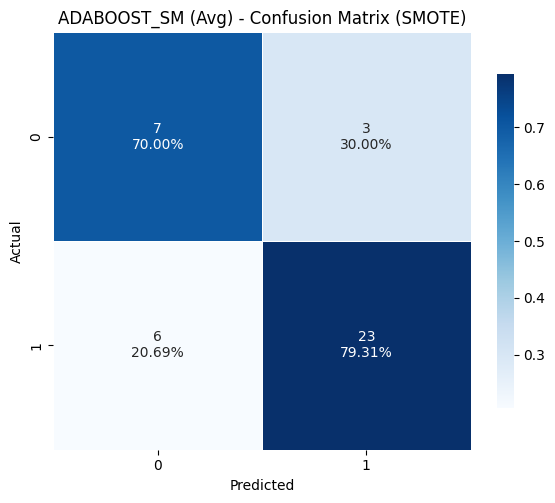

In [ ]:

# 9. AdaBoost (SMOTE)
adb_sm = AdaBoostClassifier()
evaluate_model_with_smote(adb_sm, X_train, y_train, X_test, y_test, model_name="ADABOOST_SM (Avg)")


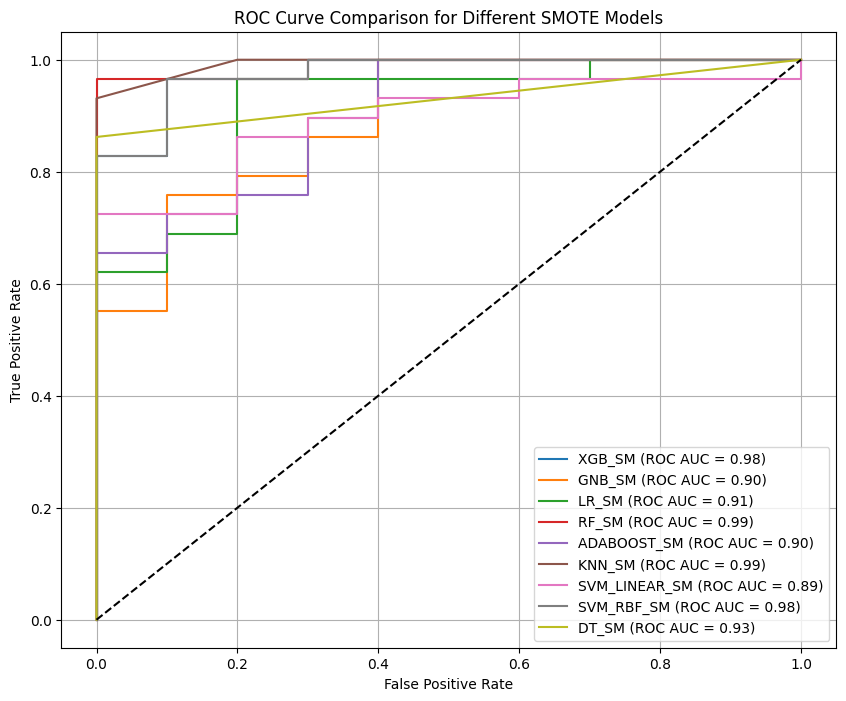

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Make sure SVC models have probability=True when initialized
# svm1 = SVC(probability=True)
# svm2 = SVC(probability=True)

# Define your models (trained after SMOTE)
models = [
    ('XGB_SM', xgb_sm),
    ('GNB_SM', gnb_sm),
    ('LR_SM', lr_sm),
    ('RF_SM', rf_sm),
    ('ADABOOST_SM', adb_sm),
    ('KNN_SM', knn_sm),
    ('svm_linear_sm', svm_linear_sm),  # Linear Kernel
    ('svm_rbf_sm', svm_rbf_sm),     # RBF Kernel
    ('DT_SM', dt_sm)
]
# Fit SVC models if not already trained
#svm1.fit(X_train, y_train.ravel())
#svm2.fit(X_train, y_train.ravel())

# Plot ROC curves and calculate ROC AUC scores for each model
plt.figure(figsize=(10, 8))
for model_name, model in models:
    # Use predict_proba if available, else fallback to decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{model_name.upper()} (ROC AUC = {roc_auc:.2f})')

# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Final plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Different SMOTE Models')
plt.legend(loc='lower right')
plt.grid(True)

# Save and show
plt.savefig('ROC_Curve_Comparison1.pdf')
plt.show()


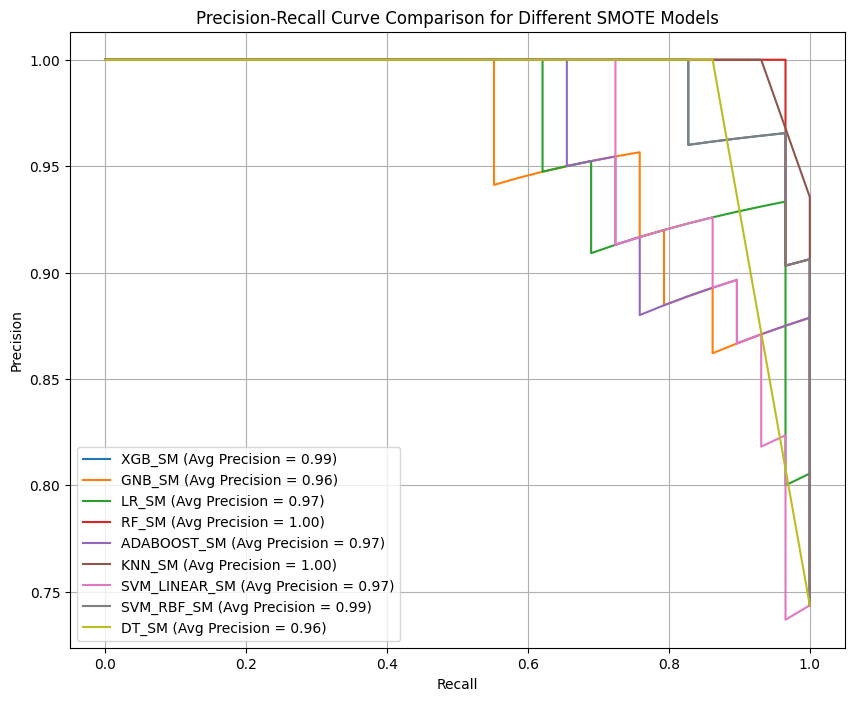

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.svm import SVC

# Make sure SVC models were initialized with probability=True
# svm1 = SVC(probability=True)
# svm2 = SVC(probability=True)

# Define your SMOTE-trained models
models = [
    ('XGB_SM', xgb_sm),
    ('GNB_SM', gnb_sm),
    ('LR_SM', lr_sm),
    ('RF_SM', rf_sm),
    ('ADABOOST_SM', adb_sm),
    ('KNN_SM', knn_sm),
    ('svm_linear_sm', svm_linear_sm),  # Linear Kernel
    ('svm_rbf_sm', svm_rbf_sm),     # RBF Kernel
    ('DT_SM', dt_sm)
]

# Fit SVM models (if not already fitted)
svm1.fit(X_train, y_train.ravel())
svm2.fit(X_train, y_train.ravel())

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for model_name, model in models:
    # Use predict_proba if available, otherwise fallback to decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_score)
    avg_precision = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, label=f'{model_name.upper()} (Avg Precision = {avg_precision:.2f})')

# Final plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison for Different SMOTE Models')
plt.legend(loc='lower left')
plt.grid(True)

# Save and show the plot
plt.savefig('Precision_Recall_Curve_Comparison1.pdf')
plt.show()


In [ ]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [ ]:
#NEAR MISS RESULT
print('After UnderSampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After UnderSampling, the shape of train_X: (76, 9)
After UnderSampling, the shape of train_y: (76,) 

After UnderSampling, counts of label '1': 38
After UnderSampling, counts of label '0': 38


In [ ]:
from imblearn.under_sampling import NearMiss

def evaluate_model_with_nearmiss(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Apply NearMiss to the training data
    nr = NearMiss()
    X_train_res, y_train_res = nr.fit_resample(X_train, y_train.ravel())

    # Train and predict
    model.fit(X_train_res, y_train_res.ravel())
    predictions = model.predict(X_test)

    print(f"\n🔍 Evaluation Report: {model_name}\n")
    print(classification_report(y_test, predictions))

    # Basic metrics
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, zero_division=0)
    rec = recall_score(y_test, predictions, zero_division=0)
    f1 = f1_score(y_test, predictions, zero_division=0)

    # Advanced metrics
    gmean = geometric_mean_score(y_test, predictions)
    mcc = matthews_corrcoef(y_test, predictions)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    try:
        msle = mean_squared_log_error(y_test, predictions)
    except ValueError:
        msle = "Not defined (due to log error - possibly negative/zero prediction)"

    mean_pred = np.mean(predictions)
    std_pred = np.std(predictions)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")
    print(f"✅ G-Mean: {gmean:.4f} | MCC: {mcc:.4f}")
    print(f"📉 MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | MSLE: {msle}")
    print(f"📊 Mean of Predictions: {mean_pred:.4f} | Std Dev: {std_pred:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(6, 5))
    labels = np.asarray([
        [f"{count}\n{percent:.2%}" for count, percent in zip(row, row_percent)]
        for row, row_percent in zip(cm, cm_norm)
    ])
    sns.heatmap(cm_norm, annot=labels, fmt="", cmap='Blues', square=True,
                cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='white')
    plt.title(f"{model_name} - Confusion Matrix (NearMiss)", fontsize=12)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



🔍 Evaluation Report: LR_MISS

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.83      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.86      0.82        39
weighted avg       0.88      0.85      0.85        39

✅ Accuracy: 0.8462
✅ Precision: 0.9600 | Recall: 0.8276 | F1-Score: 0.8889
✅ G-Mean: 0.8630 | MCC: 0.6623
📉 MSE: 0.1538 | RMSE: 0.3922 | MAE: 0.1538 | MSLE: 0.07391584829510792
📊 Mean of Predictions: 0.6410 | Std Dev: 0.4797


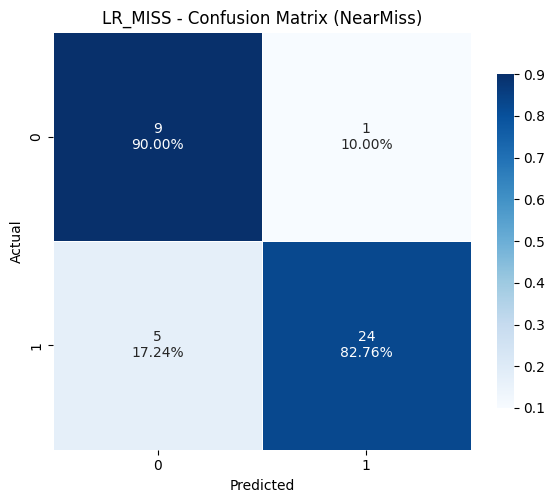

In [ ]:
# 1. Logistic Regression (NearMiss)
lr_miss = LogisticRegression(max_iter=1000)
evaluate_model_with_nearmiss(lr_miss, X_train, y_train, X_test, y_test, model_name="LR_MISS")


🔍 Evaluation Report: DT_MISS

              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.92      0.76      0.83        29

    accuracy                           0.77        39
   macro avg       0.72      0.78      0.74        39
weighted avg       0.82      0.77      0.78        39

✅ Accuracy: 0.7692
✅ Precision: 0.9167 | Recall: 0.7586 | F1-Score: 0.8302
✅ G-Mean: 0.7790 | MCC: 0.5014
📉 MSE: 0.2308 | RMSE: 0.4804 | MAE: 0.2308 | MSLE: 0.11087377244266186
📊 Mean of Predictions: 0.6154 | Std Dev: 0.4865


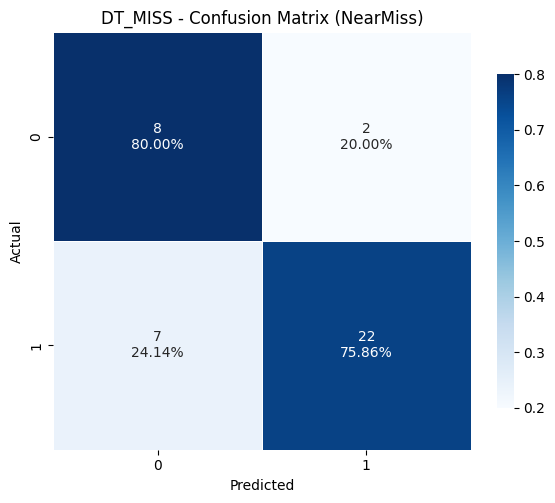

In [ ]:

# 2. Decision Tree (NearMiss)
dt_miss = DecisionTreeClassifier()
evaluate_model_with_nearmiss(dt_miss, X_train, y_train, X_test, y_test, model_name="DT_MISS")



🔍 Evaluation Report: KNN_MISS

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.86      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.93      0.88        39
weighted avg       0.93      0.90      0.90        39

✅ Accuracy: 0.8974
✅ Precision: 1.0000 | Recall: 0.8621 | F1-Score: 0.9259
✅ G-Mean: 0.9285 | MCC: 0.7847
📉 MSE: 0.1026 | RMSE: 0.3203 | MAE: 0.1026 | MSLE: 0.0492772321967386
📊 Mean of Predictions: 0.6410 | Std Dev: 0.4797


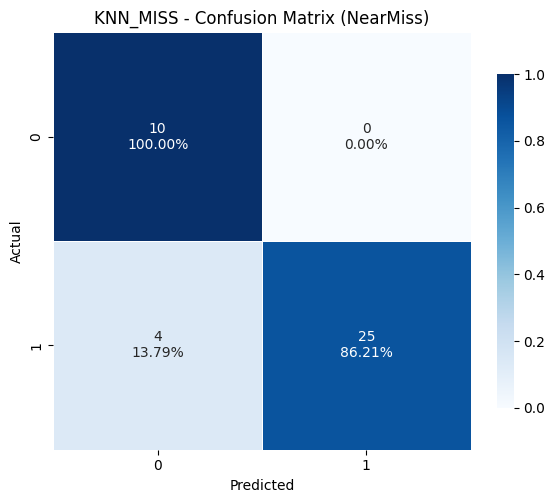

In [ ]:

# 3. KNN (NearMiss)
knn_miss = KNeighborsClassifier()
evaluate_model_with_nearmiss(knn_miss, X_train, y_train, X_test, y_test, model_name="KNN_MISS")



🔍 Evaluation Report: RF_MISS

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39

✅ Accuracy: 0.8974
✅ Precision: 0.9630 | Recall: 0.8966 | F1-Score: 0.9286
✅ G-Mean: 0.8983 | MCC: 0.7536
📉 MSE: 0.1026 | RMSE: 0.3203 | MAE: 0.1026 | MSLE: 0.0492772321967386
📊 Mean of Predictions: 0.6923 | Std Dev: 0.4615


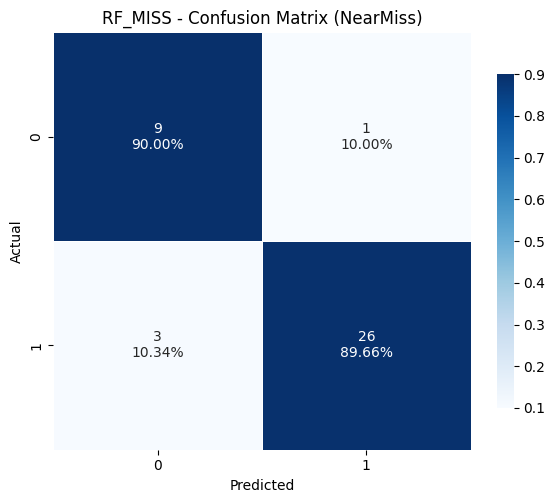

In [ ]:

# 4. Random Forest (NearMiss)
rf_miss = RandomForestClassifier()
evaluate_model_with_nearmiss(rf_miss, X_train, y_train, X_test, y_test, model_name="RF_MISS")



🔍 Evaluation Report: XGB_MISS

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39

✅ Accuracy: 0.8718
✅ Precision: 0.9615 | Recall: 0.8621 | F1-Score: 0.9091
✅ G-Mean: 0.8808 | MCC: 0.7059
📉 MSE: 0.1282 | RMSE: 0.3581 | MAE: 0.1282 | MSLE: 0.06159654024592326
📊 Mean of Predictions: 0.6667 | Std Dev: 0.4714


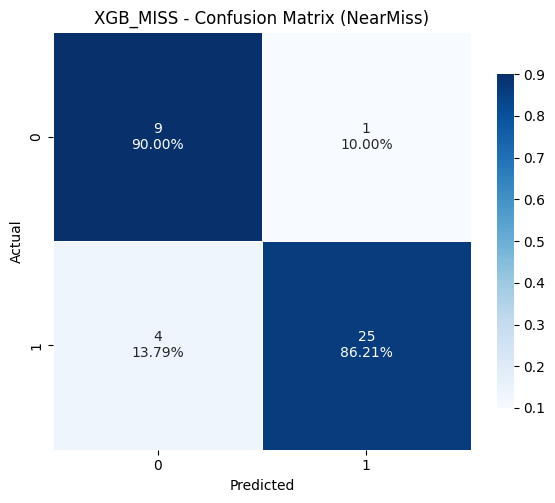

In [ ]:

# 5. XGBoost (NearMiss)
xgb_miss = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model_with_nearmiss(xgb_miss, X_train, y_train, X_test, y_test, model_name="XGB_MISS")




🔍 Evaluation Report: GNB_MISS

              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39

✅ Accuracy: 0.7179
✅ Precision: 0.9091 | Recall: 0.6897 | F1-Score: 0.7843
✅ G-Mean: 0.7428 | MCC: 0.4312
📉 MSE: 0.2821 | RMSE: 0.5311 | MAE: 0.2821 | MSLE: 0.13551238854103118
📊 Mean of Predictions: 0.5641 | Std Dev: 0.4959


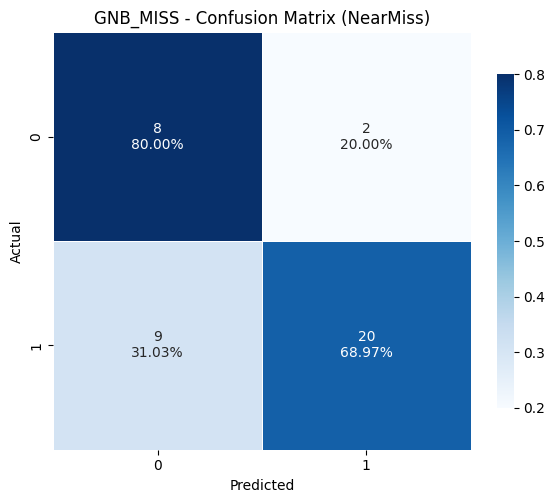

In [ ]:
# 6. Gaussian Naive Bayes (NearMiss)
gnb_miss = GaussianNB()
evaluate_model_with_nearmiss(gnb_miss, X_train, y_train, X_test, y_test, model_name="GNB_MISS")



🔍 Evaluation Report: SVM1_MISS

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.96      0.79      0.87        29

    accuracy                           0.82        39
   macro avg       0.78      0.85      0.79        39
weighted avg       0.87      0.82      0.83        39

✅ Accuracy: 0.8205
✅ Precision: 0.9583 | Recall: 0.7931 | F1-Score: 0.8679
✅ G-Mean: 0.8449 | MCC: 0.6221
📉 MSE: 0.1795 | RMSE: 0.4237 | MAE: 0.1795 | MSLE: 0.08623515634429256
📊 Mean of Predictions: 0.6154 | Std Dev: 0.4865


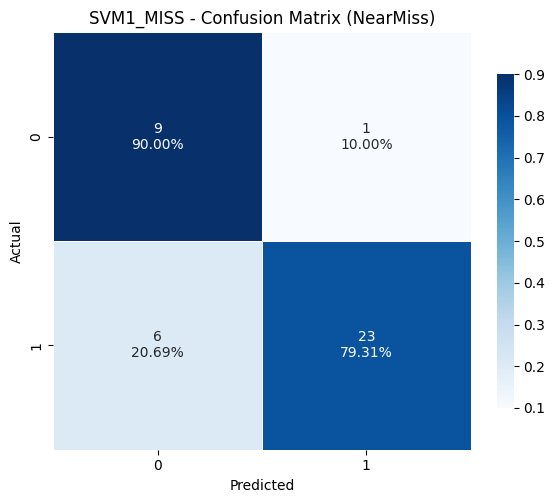

In [ ]:

# 7. SVM Linear (NearMiss)
svm_linear_miss = SVC(kernel='linear')
evaluate_model_with_nearmiss(svm_linear_miss, X_train, y_train, X_test, y_test, model_name="SVM1_MISS")



🔍 Evaluation Report: SVM2_MISS

              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39

✅ Accuracy: 0.7692
✅ Precision: 0.9545 | Recall: 0.7241 | F1-Score: 0.8235
✅ G-Mean: 0.8073 | MCC: 0.5496
📉 MSE: 0.2308 | RMSE: 0.4804 | MAE: 0.2308 | MSLE: 0.11087377244266186
📊 Mean of Predictions: 0.5641 | Std Dev: 0.4959


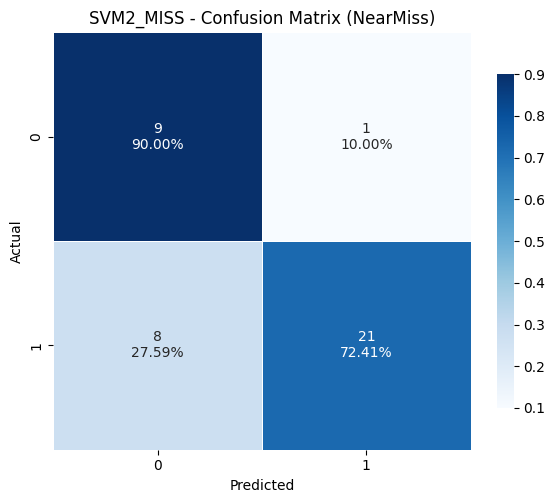

In [ ]:

# 8. SVM RBF (NearMiss)
svm_rbf_miss = SVC(kernel='rbf')
evaluate_model_with_nearmiss(svm_rbf_miss, X_train, y_train, X_test, y_test, model_name="SVM2_MISS")



🔍 Evaluation Report: ADABOOST_MISS

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.72      0.84        29

    accuracy                           0.79        39
   macro avg       0.78      0.86      0.78        39
weighted avg       0.89      0.79      0.81        39

✅ Accuracy: 0.7949
✅ Precision: 1.0000 | Recall: 0.7241 | F1-Score: 0.8400
✅ G-Mean: 0.8510 | MCC: 0.6343
📉 MSE: 0.2051 | RMSE: 0.4529 | MAE: 0.2051 | MSLE: 0.0985544643934772
📊 Mean of Predictions: 0.5385 | Std Dev: 0.4985


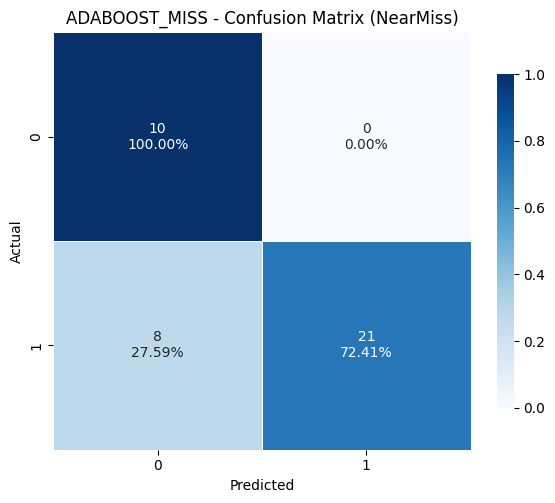

In [ ]:

# 9. AdaBoost (NearMiss)
adb_miss = AdaBoostClassifier()
evaluate_model_with_nearmiss(adb_miss, X_train, y_train, X_test, y_test, model_name="ADABOOST_MISS")


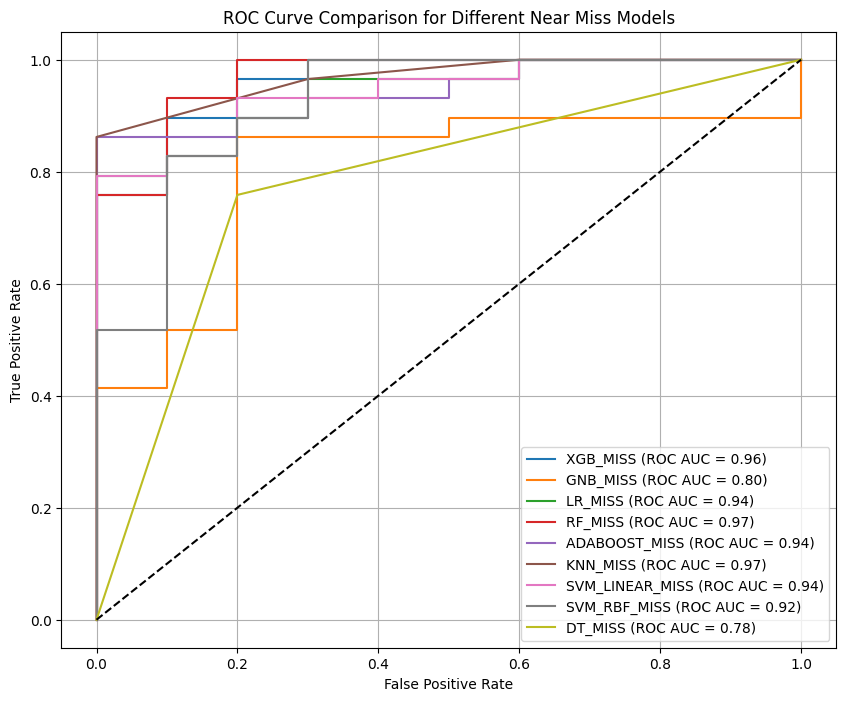

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Make sure SVC models were initialized with probability=True
# svm2 = SVC(probability=True)
# svm22 = SVC(probability=True)

# Define your NearMiss models
models = [
    ('XGB_MISS', xgb_miss),
    ('GNB_MISS', gnb_miss),
    ('LR_MISS', lr_miss),
    ('RF_MISS', rf_miss),
    ('ADABOOST_MISS', adb_miss),
    ('KNN_MISS', knn_miss),
    ('svm_linear_miss', svm_linear_miss),
    ('svm_rbf_miss', svm_rbf_miss),
    ('DT_MISS', dt_miss)
]

# Fit the SVM models (correct ones)
#svm2.fit(X_train, y_train.ravel())
#svm22.fit(X_train, y_train.ravel())

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, model in models:
    # Use predict_proba if available, else fallback to decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{model_name.upper()} (ROC AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Final plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Different Near Miss Models')
plt.legend(loc='lower right')
plt.grid(True)

# Save and show
plt.savefig('ROC_Curve_Comparison2.pdf')
plt.show()


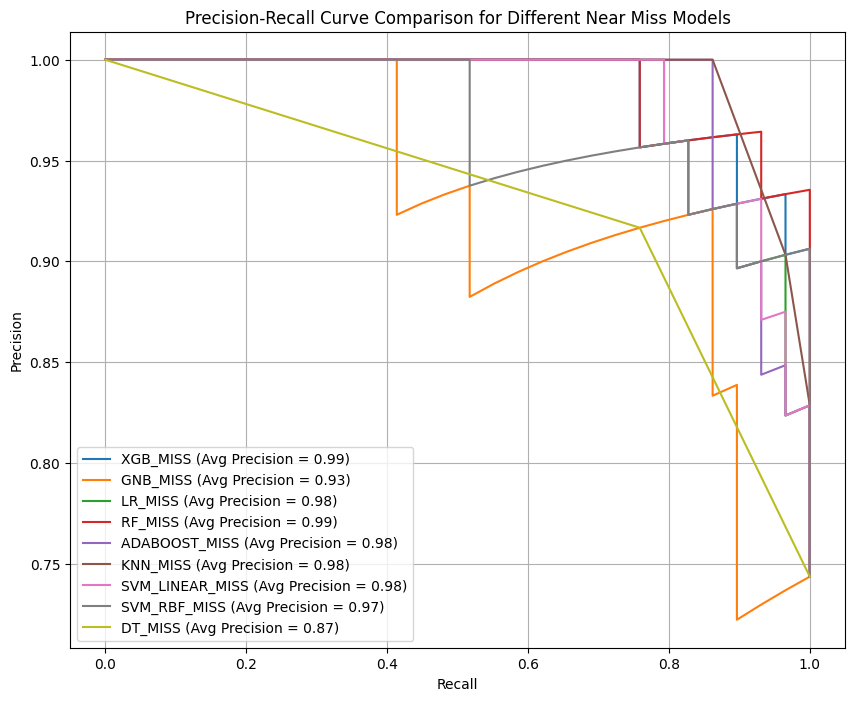

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.svm import SVC

# Make sure SVC models were initialized with probability=True
# svm2 = SVC(probability=True)
# svm22 = SVC(probability=True)

# Define your NearMiss-trained models
models = [
    ('XGB_MISS', xgb_miss),
    ('GNB_MISS', gnb_miss),
    ('LR_MISS', lr_miss),
    ('RF_MISS', rf_miss),
    ('ADABOOST_MISS', adb_miss),
    ('KNN_MISS', knn_miss),
    ('svm_linear_miss', svm_linear_miss),
    ('svm_rbf_miss', svm_rbf_miss),
    ('DT_MISS', dt_miss)
]

# Fit SVM models
#svm2.fit(X_train, y_train.ravel())
#svm22.fit(X_train, y_train.ravel())

# Plot PRC curves
plt.figure(figsize=(10, 8))
for model_name, model in models:
    # Use predict_proba if available, otherwise fallback to decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_score)
    avg_precision = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, label=f'{model_name.upper()} (Avg Precision = {avg_precision:.2f})')

# Add labels, title, legend, and grid
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison for Different Near Miss Models')
plt.legend(loc='lower left')
plt.grid(True)

# Save and show the plot
plt.savefig('Precision_Recall_Curve_Comparison2.pdf')
plt.show()


**Hyperparameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, mean_squared_error,
    mean_absolute_error, mean_squared_log_error, matthews_corrcoef,
    accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Common Evaluation Function
# -----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)

    print(f"\n🔍 Evaluation Report: {model_name}\n")
    print(classification_report(y_test, predictions))

    # Basic metrics
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, zero_division=0)
    rec = recall_score(y_test, predictions, zero_division=0)
    f1 = f1_score(y_test, predictions, zero_division=0)
    gmean = geometric_mean_score(y_test, predictions)
    mcc = matthews_corrcoef(y_test, predictions)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    try:
        msle = mean_squared_log_error(y_test, predictions)
    except ValueError:
        msle = "Not defined"

    mean_pred = np.mean(predictions)
    std_pred = np.std(predictions)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")
    print(f"✅ G-Mean: {gmean:.4f} | MCC: {mcc:.4f}")
    print(f"📉 MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | MSLE: {msle}")
    print(f"📊 Mean Prediction: {mean_pred:.4f} | Std Dev: {std_pred:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    labels = np.asarray([
        [f"{count}\n{percent:.2%}" for count, percent in zip(row, row_percent)]
        for row, row_percent in zip(cm, cm_norm)
    ])

    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=labels, fmt="", cmap='Blues', square=True,
                cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='white')
    plt.title(f"{model_name} - Confusion Matrix", fontsize=12)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# -----------------------------
# Common Param Grid for KNN
# -----------------------------
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


# -----------------------------
# 1. BASE DATA
# -----------------------------
knn_base = KNeighborsClassifier()
grid_base = GridSearchCV(knn_base, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_base.fit(X_train, y_train.ravel())

print("\n📌 Best Hyperparameters [KNN - Base]:")
print(grid_base.best_params_)
print(f"F1 Score (CV Avg): {grid_base.best_score_:.4f}")

best_knn_base = grid_base.best_estimator_
evaluate_model(best_knn_base, X_train, y_train, X_test, y_test, model_name="KNN_TUNED_BASE")


# -----------------------------
# 2. SMOTE DATA
# -----------------------------
sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

knn_sm = KNeighborsClassifier()
grid_sm = GridSearchCV(knn_sm, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_sm.fit(X_train_sm, y_train_sm.ravel())

print("\n📌 Best Hyperparameters [KNN - SMOTE]:")
print(grid_sm.best_params_)
print(f"F1 Score (CV Avg): {grid_sm.best_score_:.4f}")

best_knn_sm = grid_sm.best_estimator_
evaluate_model(best_knn_sm, X_train_sm, y_train_sm, X_test, y_test, model_name="KNN_TUNED_SMOTE")


# -----------------------------
# 3. NEARMISS DATA
# -----------------------------
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

knn_miss = KNeighborsClassifier()
grid_miss = GridSearchCV(knn_miss, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_miss.fit(X_train_miss, y_train_miss.ravel())

print("\n📌 Best Hyperparameters [KNN - NearMiss]:")
print(grid_miss.best_params_)
print(f"F1 Score (CV Avg): {grid_miss.best_score_:.4f}")

best_knn_miss = grid_miss.best_estimator_
evaluate_model(best_knn_miss, X_train_miss, y_train_miss, X_test, y_test, model_name="KNN_TUNED_MISS")


In [ ]:
print(features_for_lime)


['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2', 'PPE', 'NHR']


In [ ]:
#pip install lime

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=features_for_lime,
    class_names=['0', '1'],
    mode='classification'
)

In [ ]:

# Use iloc to correctly access the 2nd row
exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=best_knn_sm.predict_proba
)

exp.show_in_notebook(show_table=True)


In [ ]:
#pip install shap

In [ ]:
import shap


ExactExplainer explainer: 40it [02:08,  3.47s/it]


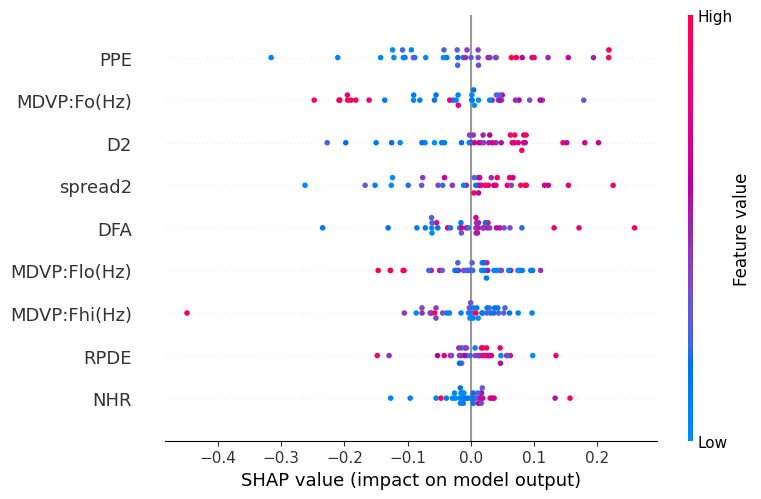

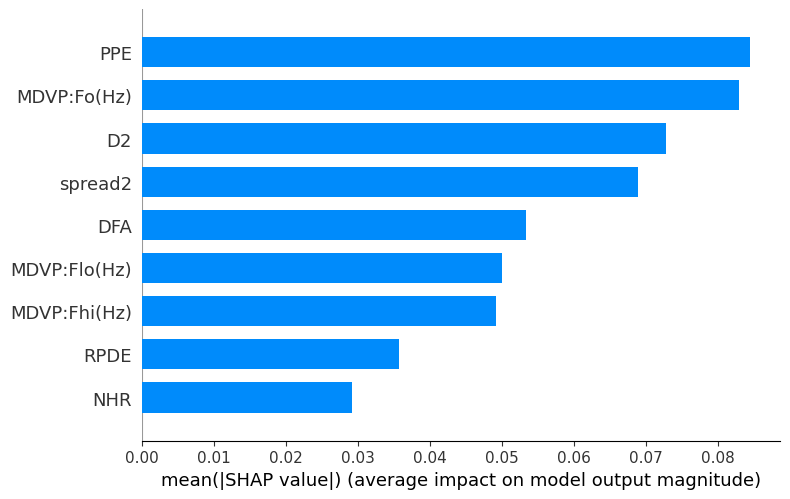

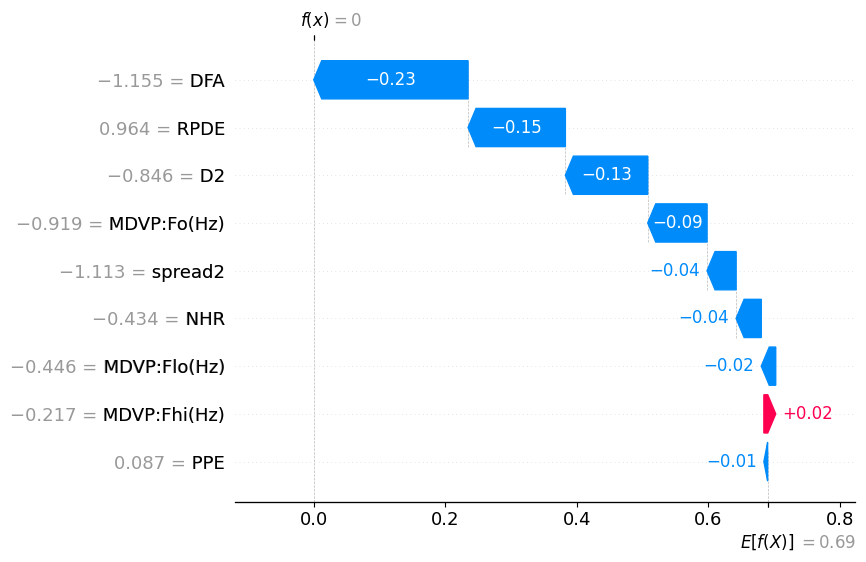

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.Explainer(best_knn_sm.predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X_test)

# Optional: summary plot (bar chart version)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Optional: force plot for one specific prediction
shap.plots.force(shap_values[0])  # 0 = first test sample

# Optional: waterfall plot for detailed breakdown
shap.plots.waterfall(shap_values[0])


# **REST**

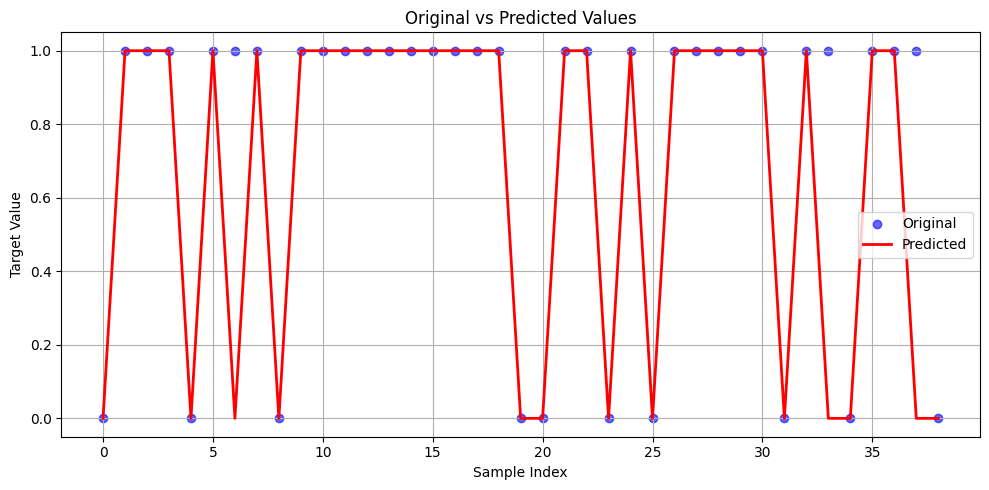

In [ ]:
import matplotlib.pyplot as plt

# Make sure this model is already fitted
yhat = best_knn_sm.predict(X_test)

# Convert y_test if it's a pandas Series
y = y_test.values if hasattr(y_test, 'values') else y_test
x = list(range(len(y)))

plt.figure(figsize=(10, 5))
plt.scatter(x, y, color="blue", label="Original", alpha=0.6)
plt.plot(x, yhat, color="red", label="Predicted", linewidth=2)

plt.title("Original vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


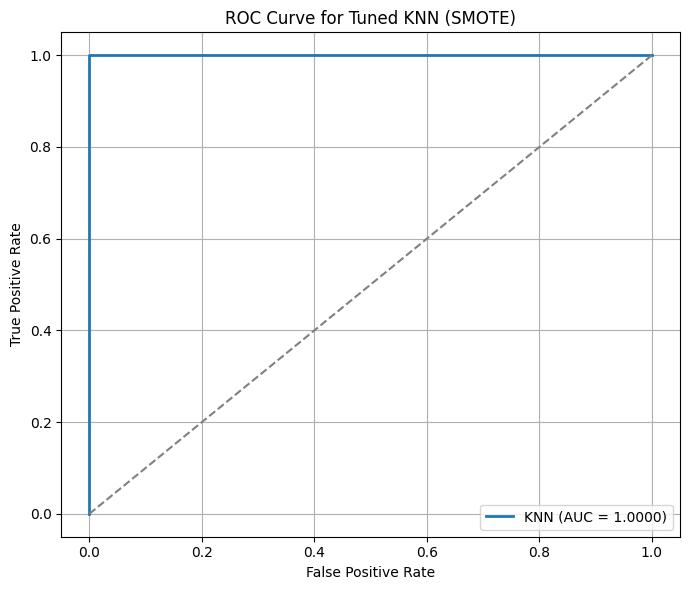

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming your tuned model and test data are:
# best_knn_sm, X_test, y_test

# Get predicted probabilities for ROC
y_proba = best_knn_sm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {auc_score:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Tuned KNN (SMOTE)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


ensamble
